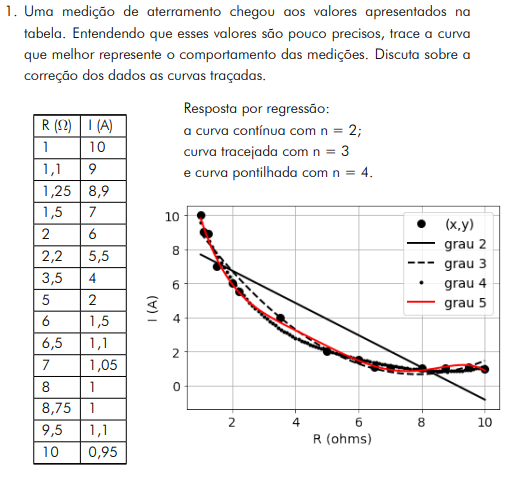

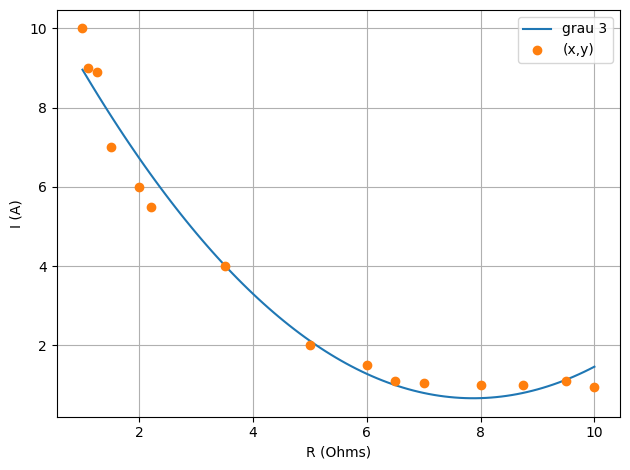

In [1]:
# Capítulo 7: Ajuste de curvas
# Regressão polinômial
# Fellipe Carvalho

# importa a biblioteca necessária para a resolução do problema
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


Fig, ax = plt.subplots()
ax.grid(True)
# tabela com os valores de resistência e corrente
x = np.transpose([1, 1.1, 1.25, 1.5, 2, 2.2, 3.5, 5, 6, 6.5, 7, 8, 8.75, 9.5, 10])
y = np.transpose([10, 9, 8.9, 7, 6, 5.5, 4, 2, 1.5, 1.1, 1.05, 1, 1, 1.1, 0.95])
n = len(x)  # número de amostras
sx = sum(x)
sy = sum(y)  # soma
mx = sx/n
my = sy/n
# equações para os cálculos necessários
sx2 = sum(x * x)
sx3 = sum(x * x * x)
sx4 = sum(x * x * x * x)
sxy = sum(x * y)
sx2y = sum(x * x * y)
x = [1, 1.1, 1.25, 1.5, 2, 2.2, 3.5, 5, 6, 6.5, 7, 8, 8.75, 9.5, 10]
y = [10, 9, 8.9, 7, 6, 5.5, 4, 2, 1.5, 1.1, 1.05, 1, 1, 1.1, 0.95]
A = np.array([[n, sx, sx2], [sx, sx2, sx3], [sx2, sx3, sx4]])
b = np.transpose([sy, sxy, sx2y])
c = np.linalg.lstsq(A, b, rcond=None)[0]  
yy = sum(np.power((y-my), 2))             
yyy = 0
for i in range(0, n):
    yyy = yyy + (y[i] - c[0] - c[1]*x[i] - c[2] * x[i] ** 2) ** 2

r2 = (yy - yyy) / yy
r = sqrt(r2)
V = 30
I = c[0] + c[1] * V + c[2] * np.power(V, 2)
# plotagem do gráfico e equações
xx = np.linspace(min(x), max(x), 100)
yy = c[0] + c[1] * xx + c[2] * np.power(xx, 2)
ax.plot(xx, yy, label='grau 3')
ax.plot(x, y, 'o', label="(x,y)")
ax.set_xlabel('R (Ohms)')
ax.set_ylabel('I (A)')

plt.tight_layout()
plt.legend()
plt.show()

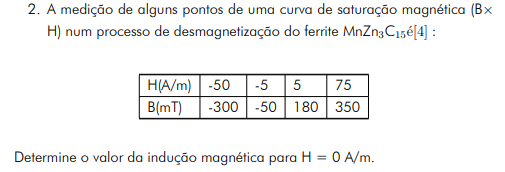

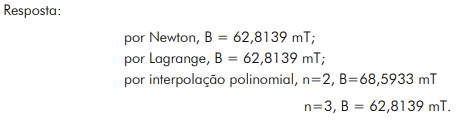

In [4]:
# Capítulo 7: Ajuste de curvas
# Polinômios interpoladores de Newton
# Fellipe Carvalho

# importa a biblioteca necessária para a resolução do problema
import numpy as np
import matplotlib.pyplot as plt

# valores da curva de saturação
x = ([-50, -5, 5, 75])
y = ([-300, -50, 180, 350]) 
xx = 0
n = len(x)
b = np.zeros((n, n))
# atribui as variaveis dependentes à primeira coluna de b
b[:n, 0] = y[:]
for j in range(1, n):
    for i in range(0, n - j + 1):
        if i + j != n:
            b[i, j] = (b[i + 1, j - 1] - b[i, j - 1]) / (x[i + j] - x[i])
# usa as diferenças divididas finitas para interpolar
xt = 1
yint = b[0, 0]
for j in range(0, n - 1):
    xt = xt*(xx - x[j])
    yint = yint+b[0, j + 1] * xt
print(f'yint = {yint:.4f}')  # Valor da interpolação para temp de 30 graus
# Comparação com funções nativas!
P = np.polyfit(x, y, 2)  # ajusta por mínimos quadrados um polinômio de n grau
s = np.polyval(P, xx)

yint = 62.8139


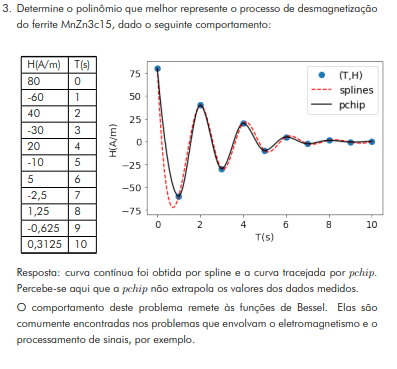

Interpolação Spline: y = 26.5509
Interpolação Pchip: y = 5.0000
A =
 [[1. 0. 0. 0. 0. 0.]
 [1. 4. 1. 0. 0. 0.]
 [0. 1. 4. 1. 0. 0.]
 [0. 0. 1. 4. 1. 0.]
 [0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 0. 0. 1.]]
pp =
 [[   0.]
 [ 720.]
 [-510.]
 [ 360.]
 [-240.]
 [   0.]]
c =
 [ 0.00074557  0.00245418 -0.0009941   0.00071451 -0.00062131 -0.00024852]
d =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


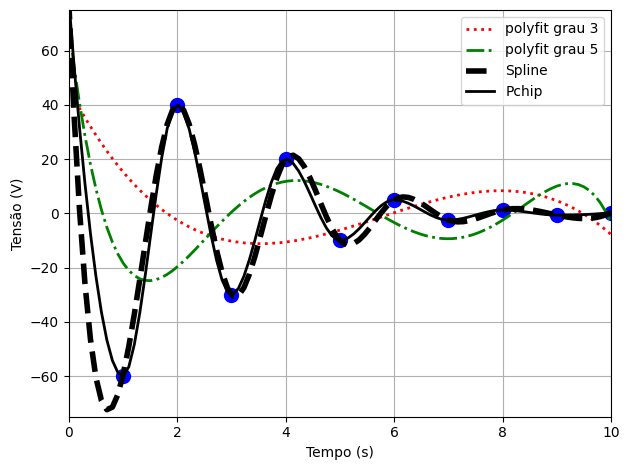

In [3]:
# Capítulo 7: Ajuste de Curvas
# SPLINES
# Fellipe Carvalho

# importa a biblioteca necessária para a resolução do problema
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sp

# definições das variáveis
def Spline(x_interp, x_pontos, fx_pontos):
    tck = sp.splrep(x_pontos, fx_pontos)
    return sp.splev(x_interp, tck)


def Pchip(x_interp, x_pontos, fx_pontos):
    pchip = sp.PchipInterpolator(x_pontos, fx_pontos)
    return pchip(x_interp)

# valores da tabela 
tempo = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tensao = [80, -60, 40, -30, 20, -10, 5, -2.5, 1.25, -0.625, 0.3125]
tt = 11

# imprime na tela
print(f'Interpolação Spline: y = {Spline(tt,tempo,tensao):.4f}')
print(f'Interpolação Pchip: y = {Pchip(tt,tempo,tensao):.4f}')

# plotagem do gráfico
plt.grid(True)
plt.plot(tempo, tensao, 'o', markersize=10, color='b')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')

# Comparação com funções nativas
P = np.polyfit(tempo, tensao, 3)  # ajusta por mínimos quadrados um polinômio de grau 3
xp = np.linspace(min(tempo), max(tempo), 100)
ss = np.polyval(P, xp)
plt.plot(xp, ss, 'r:', linewidth=2, label='polyfit grau 3')

P = np.polyfit(tempo, tensao, 5)  # ajusta por mínimos quadrados um polinômio de grau 5
ss = np.polyval(P, xp)
plt.plot(xp,  ss, 'g-.', linewidth=2, label='polyfit grau 5')

yy = Spline(x_interp=xp, x_pontos=tempo, fx_pontos=tensao)
plt.plot(xp, yy, 'k--', linewidth=4, label='Spline')
yy = Pchip(x_interp=xp, x_pontos=tempo, fx_pontos=tensao)
plt.plot(xp, yy, 'k', linewidth=2, label='Pchip')
plt.xlim(0, 10)
plt.ylim(-75, 75)
plt.tight_layout()

h = np.zeros(len(tempo)-1)
p = np.zeros(len(tempo)-1)
for i in range(0, (len(tempo) - 1)):
    h[i] = tempo[i + 1] - tempo[i]
    p[i] = (tensao[i + 1] - tensao[i]) / (tempo[i + 1] - tempo[i])

# utilização do método de interpolação
A = np.array([[1, 0, 0, 0, 0, 0],
             [h[0], 2*(h[0]+h[1]), h[1], 0, 0, 0],
             [0, h[1], 2*(h[1]+h[2]), h[2], 0, 0],
             [0, 0, h[2], 2*(h[2]+h[3]), h[3], 0],
             [0,  0, 0, h[3], 2*(h[3]+h[4]), h[4]],
             [0, 0, 0, 0, 0, 1]])

print(f'A =\n {A}')

pp = np.array([0, 3 * (p[1] - p[0]), 3 * (p[2] - p[1]), 3 * (p[3] - p[2]), 3 * (p[4] - p[3]), 0])
pp = np.transpose([pp])

c = np.linalg.lstsq(pp, A, rcond=None)[0][0]
b = np.zeros(len(tempo) - 1)
d = np.zeros(len(tempo) - 1)
print(f'pp =\n {pp}')
print(f'c =\n {c}')
#for i in range(0, (len(tempo) - 1)):
#    d[i] = (c[i + 1] - c[i]) / 3 * h[i]
print(f'd =\n {d}')
#for i in range(0, (len(tempo) - 1)):
#    b[i] = ((tensao[i + 1] - tensao[i]) / h[i]) - (h[i] / 3) * (2 * (c[i]) + c[i + 1])
print(f'b =\n {b}')
plt.legend()
plt.show()

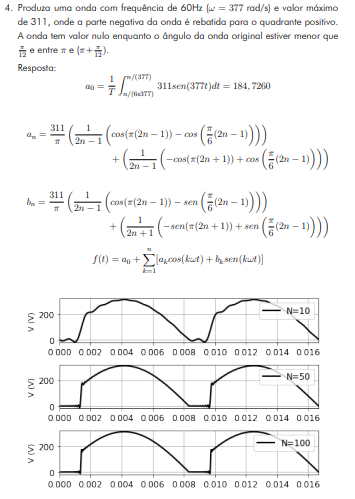

In [5]:
# Capítulo 7: Ajuste de curvas
# Curvas Senoidais
# Fellipe Carvalho

# importa a biblioteca necessária para a resolução do problema
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi

MAX = [10, 50, 100]
ts = []
xx = np.zeros((len(MAX),1000))

Fig = plt.figure()
axes = []

for i in range(0,len(MAX)):
    nMax = MAX[i]


    f = 60
    div = 6  #divisor de pi, gera o angulo onde ocorre a descontinuidade.
    Vmax = 311
    T = 1/f
    w = 2*pi*f
    pxt = 1000  # resolução

    a0 = (Vmax/pi)*(np.cos(pi/div)-np.cos(pi))

    t = np.linspace(0,T,pxt)
    t = np.array([t])

    n = np.linspace(1,nMax,nMax)
    n = n.reshape(nMax,1)
  
    
    cosnt = np.cos(np.dot(n,t)*4*pi*f)
    sinnt = np.sin(np.dot(n,t)*4*pi*f)
    n = 0
    
  # cálculo necessário para a equação num laço de repetição
    ann = np.array([])
    bnn = np.array([])
    while n < (nMax+1): 
        if n != 0:
          ann = np.append(ann,(Vmax/pi)*(((np.cos(pi*(2*n - 1))-(np.cos(pi*(2*n - 1)/div)))/(2*n - 1))+((np.cos(pi*(2*n + 1)/div) - (np.cos(pi*(2*n + 1))))/(2*n + 1))))
          bnn = np.append(bnn,(Vmax/pi)*(((np.sin(pi*(2*n - 1)) - (np.sin(pi*(2*n - 1)/div)))/(2*n - 1))+((np.sin(pi*(2*n + 1)/div) - (np.sin(pi*(2*n + 1))))/(2*n + 1))))
        n = n+1

    soma = np.dot(ann,cosnt) + np.dot(bnn,sinnt)  # faz uma soma dos valores 
    xt = a0 + soma  # define Xt
    
    xx[i,:] = xt
    ts.append(t[0])

    axes.append(Fig.add_subplot(f'{len(MAX)}1{i+1}'))
    

for index in range(0,len(axes)):
  axes[index].plot(ts[index],xx[index,:],'k-',linewidth = 2,label = f'N={MAX[index]}')
  axes[index].set_ylabel('V (V)')
  axes[index].set_xlim([0,T])
  axes[index].set_ylim([-20,320])
  axes[index].grid(True)
  axes[index].legend(loc = 'upper right')
    


plt.tight_layout()

plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>